<a href="https://colab.research.google.com/github/pratu96/DBMS-PRACTICAL-/blob/main/oIBSIP_Levek_1_Task_1_Exploratory_Data_Analysis_(EDA)_on_Retail_Sales_Data_ipynp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the liabraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**2.Mount the Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**3.Importing the Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/retail_sales_dataset.csv')

In [ ]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


**Describing the Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:

df.shape

(1000, 9)

**Checking the data that is there any null values are there or not.**

In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


**4.Visualize the Dataset**

In [ ]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


**Uniques Values of the dataset**

In [ ]:
df.nunique()

,0
Transaction ID,1000
Date,345
Customer ID,1000
Gender,2
Age,47
Product Category,3
Quantity,4
Price per Unit,5
Total Amount,18


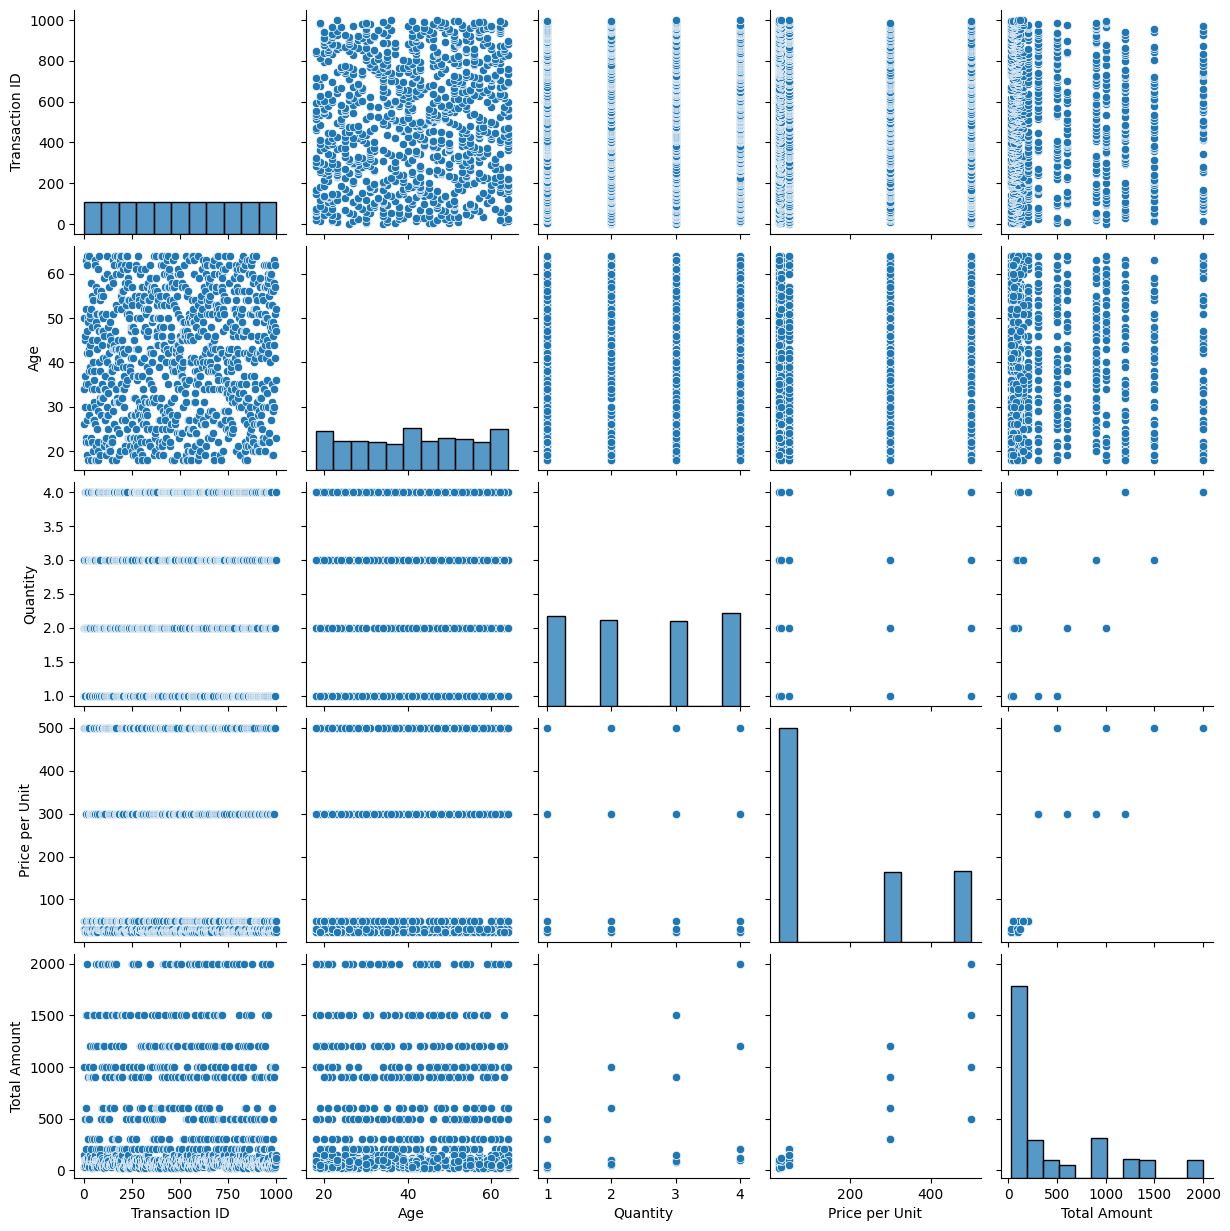

In [ ]:
sns.pairplot(df)

In [ ]:
df[df['Product Category'].isin(['Clothing','Beauty','Electronics'])]['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


/tmp/ipython-input-569735965.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Product Category'], palette='pastel')


<function matplotlib.pyplot.show(close=None, block=None)>

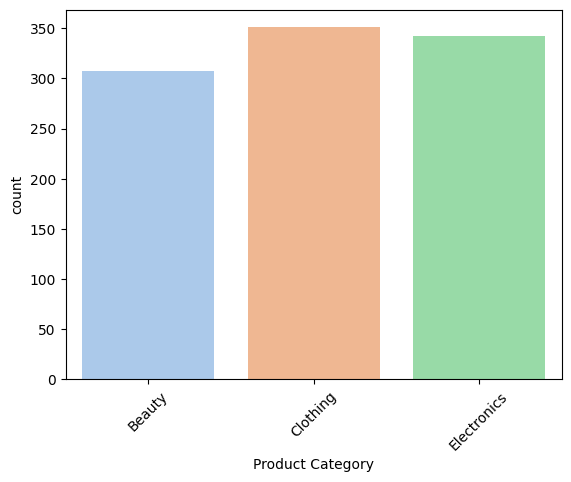

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#example count plot with a color palette
sns.countplot(x=df['Product Category'], palette='pastel')

plt.xticks(rotation=45) #Rotate x abels if needed
plt.show

In [ ]:
df.groupby('Product Category')[['Quantity','Total Amount']].sum()

,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


/tmp/ipython-input-1657589529.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Category_summary.index, y=Category_summary['Quantity'], ax=ax[0], palette='Blues')
/tmp/ipython-input-1657589529.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Category_summary.index, y=Category_summary['Total Amount'], ax=ax[1], palette='Greens')


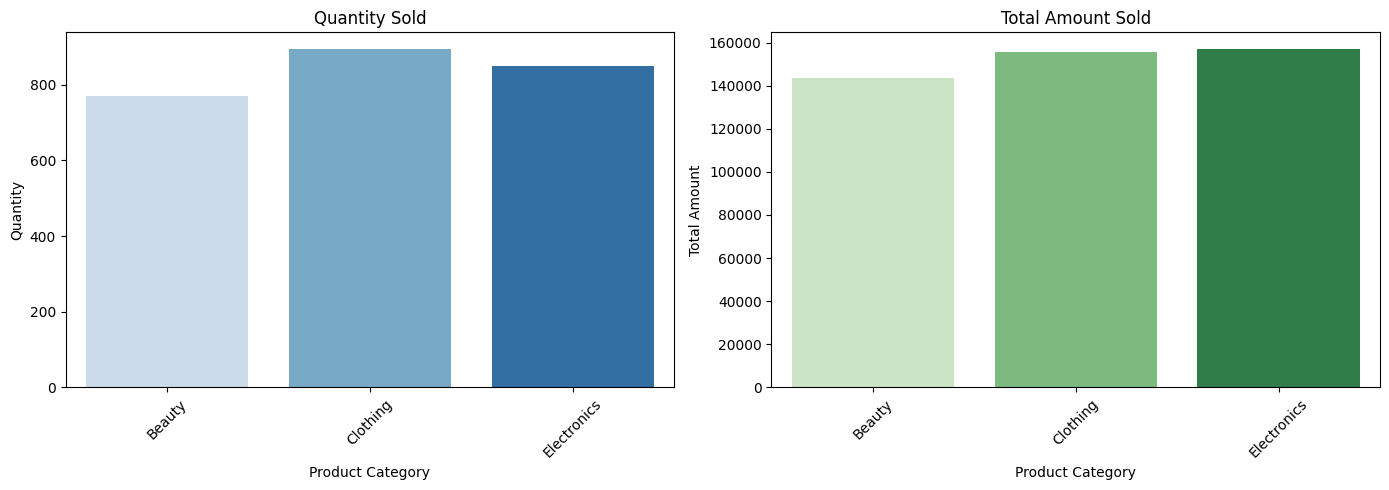

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Grouping data
Category_summary = df.groupby('Product Category')[['Quantity','Total Amount']].sum()

#Creating a bar plot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot for Quantity
sns.barplot(x=Category_summary.index, y=Category_summary['Quantity'], ax=ax[0], palette='Blues')
ax[0].set_title('Quantity Sold')
ax[0].set_xlabel('Product Category')
ax[0].set_ylabel('Quantity')
ax[0].tick_params(axis='x', rotation=45)

# Bar plot for Total Amount
sns.barplot(x=Category_summary.index, y=Category_summary['Total Amount'], ax=ax[1], palette='Greens')
ax[1].set_title('Total Amount Sold')
ax[1].set_xlabel('Product Category')
ax[1].set_ylabel('Total Amount')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Create a pie chart for showing the percentage for each product Category**

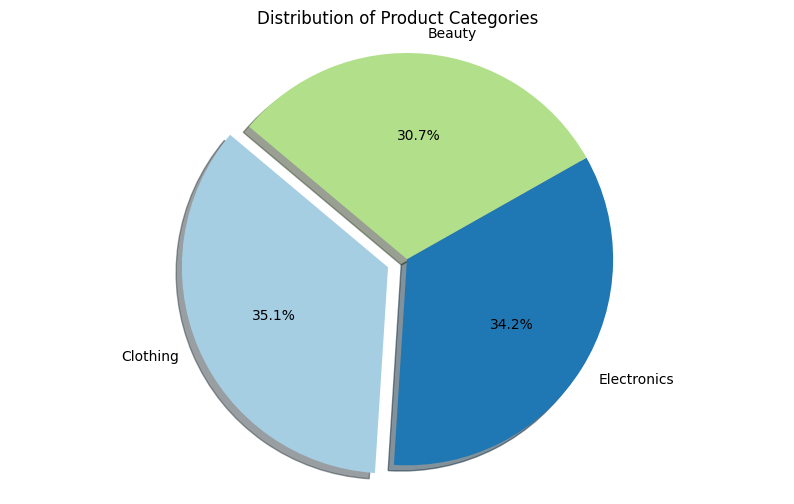

In [ ]:
#Count occurrences of each product Category
Category_counts = df['Product Category'].value_counts()

# Define explode to highlight the largest category
explode_list = [0.1 if i == Category_counts.idxmax() else 0 for i in Category_counts.index]

#Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(Category_counts, labels=Category_counts.index, autopct='%1.1f%%',colors=plt.cm.Paired.colors, explode=explode_list, startangle=140, shadow=True)

plt.title('Distribution of Product Categories')
plt.axis('equal')
plt.show()

**split the dates into day, month and year**

In [ ]:
#seeing the date column
df['Date'] = pd.to_datetime(df['Date'])
# add month column and extract month from date
df['Month'] = df['Date'].dt.month_name()
df['Month']

,Month
0,November
1,February
2,January
3,May
4,May
...,...
995,May
996,November
997,October
998,December


**Total seles amount over each month**

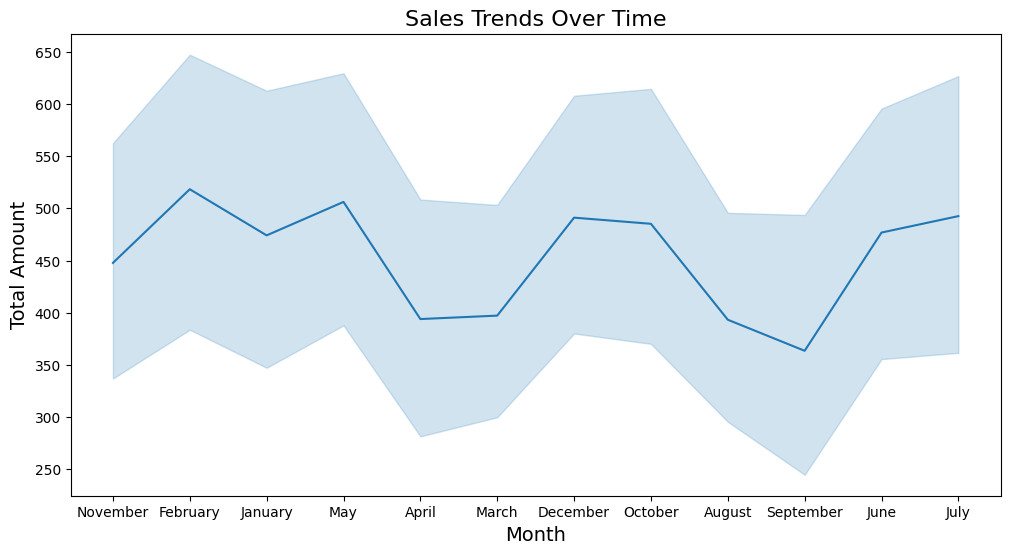

In [ ]:
#sales trends overtime
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total Amount', data=df)
plt.title('Sales Trends Over Time',fontsize=16)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Total Amount',fontsize=14)
plt.show()

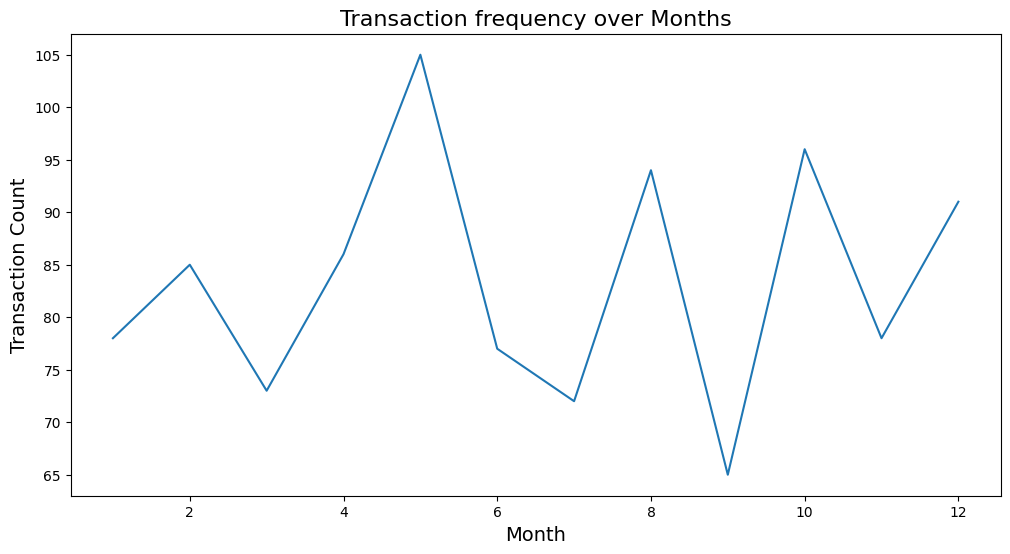

In [ ]:
df['Month'] = df['Date'].dt.month
trancsaction_count = df.groupby('Month')['Transaction ID'].count()


plt.figure(figsize=(12, 6))
sns.lineplot(x=trancsaction_count.index, y=trancsaction_count.values)
plt.title('Transaction frequency over Months',fontsize=16)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Transaction Count',fontsize=14)
plt.show()

sales heatmap

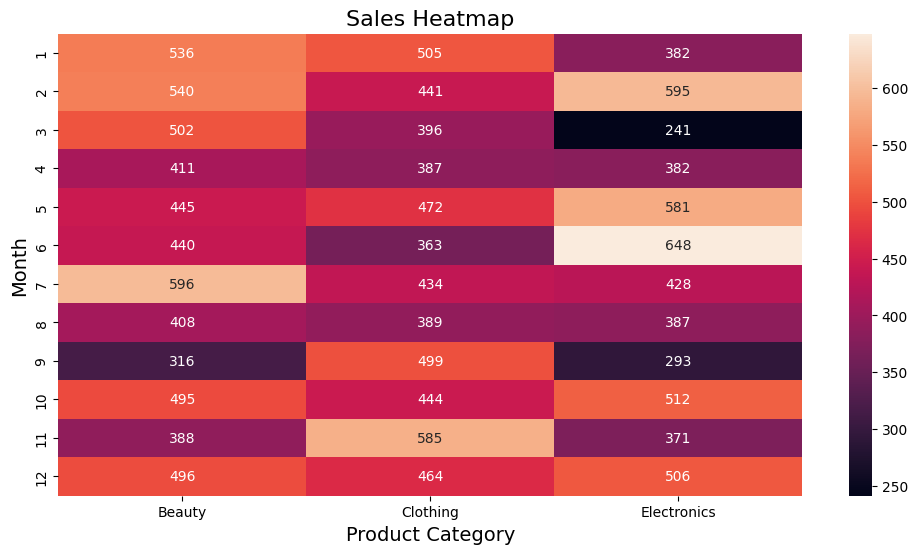

In [ ]:
heatmap = df.pivot_table(values='Total Amount', index='Month', columns='Product Category')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap, annot=True, fmt ='.0f')
plt.title('Sales Heatmap',fontsize=16)
plt.xlabel('Product Category',fontsize=14)
plt.ylabel('Month',fontsize=14)
plt.show()

**Gender for male and female**

In [ ]:
df['Age'].count()

np.int64(1000)

In [ ]:
df[df['Gender'].isin(['Male','Female'])]['Gender'].value_counts()

,count
Gender,
Female,510
Male,490


**Pie Chart**

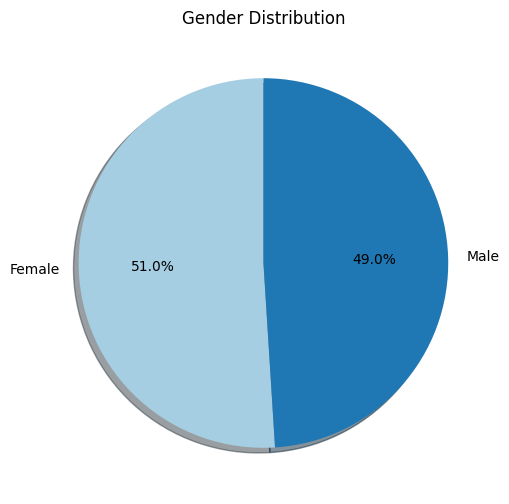

In [ ]:
gender_counts = {'Female':510, 'Male': 490}
#plot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts.values(), labels=gender_counts.keys(), autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90, shadow=True)
plt.title('Gender Distribution')
plt.show()


**Bining the Age**

In [ ]:
age_bins = [0, 18, 25, 35, 50, 100]
age_group = ['0-18', '19-25', '26-35', '36-50', '50+']
df['Age Group'] = pd.cut(df['Age'], bins = age_bins, labels=age_group)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,36-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,36-50
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,26-35


**Distribution of the age and gender column In product category**

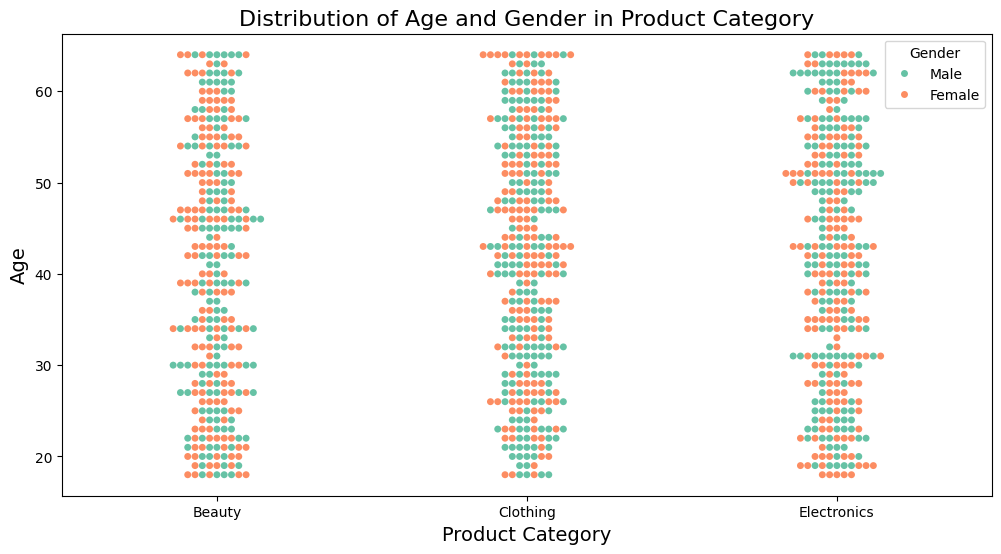

In [ ]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Product Category', y='Age', hue='Gender', data=df, palette= 'Set2')
plt.title('Distribution of Age and Gender in Product Category',fontsize=16)
plt.xlabel('Product Category',fontsize=14)
plt.ylabel('Age',fontsize=14)
plt.legend(title='Gender', loc ='upper right', fontsize= 10)
plt.show()

**Histogram for count of age persons**

<Axes: title={'center': 'Age of persons'}, xlabel='Age', ylabel='count'>

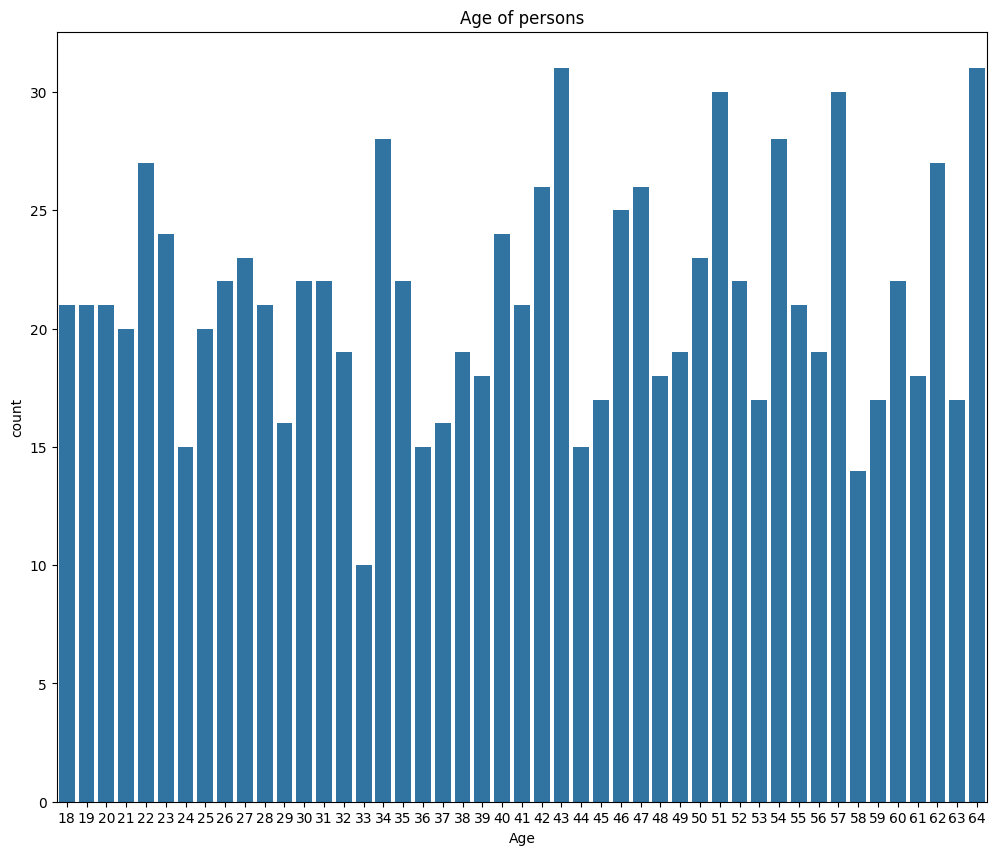

In [ ]:
plt.figure(figsize=(12, 10))
plt.title('Age of persons')
plt.xlabel('Age')
sns.countplot(x='Age', data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Month             1000 non-null   int32         
 10  Age Group         1000 non-null   category      
dtypes: category(1), datetime64[ns](1), int32(1), int64(5), object(3)
memory usage: 75.5+ KB


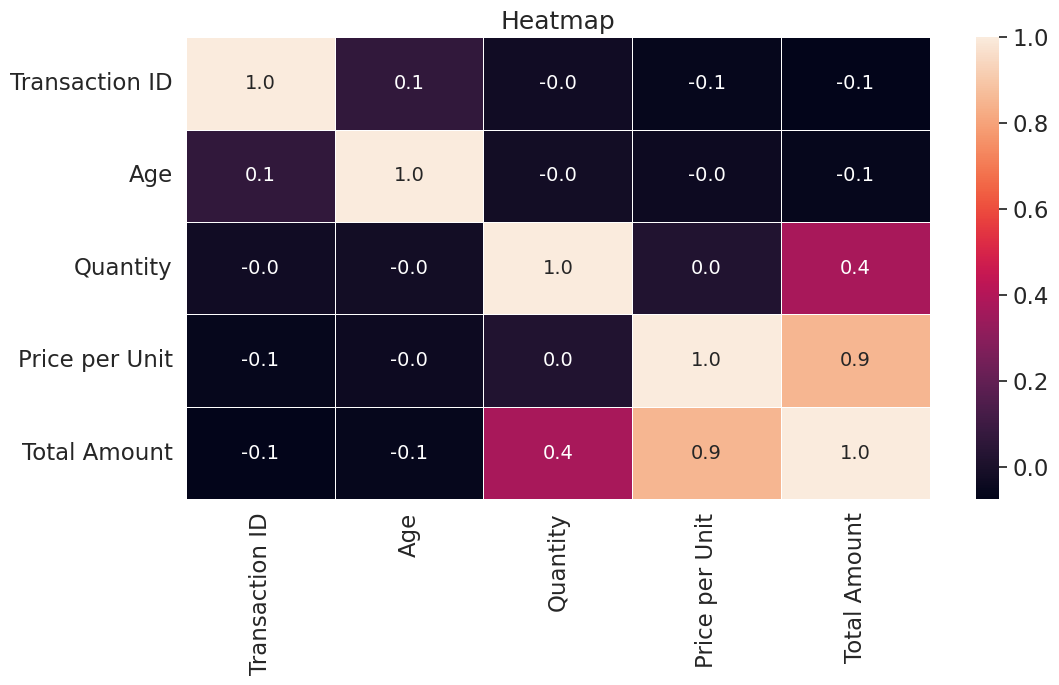

In [ ]:
correlation=df[df.dtypes[df.dtypes == 'int64'].index].corr()
sns.set(font_scale=1.5)
plt.figure(figsize = (12, 6))
plt.title("Heatmap", fontsize= 18)
ax = sns.heatmap(correlation, annot=True,annot_kws={"size": 14}, fmt= '.1f', linewidth = .5)